In [1]:
import re
import unicodedata
import spacy
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/lang8.train.auto.bea19.m2') as f:
  data = f.readlines()

In [3]:
print(len(data))

4015882


In [4]:
m2 = open('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/lang8.train.auto.bea19.m2').read().strip().split("\n\n")
out = open('corrected.txt', "w")
in_ = open('error.txt', "w")

skip = {"noop", "UNK", "Um"}

for sent in tqdm(m2):
  sent = sent.split("\n")
  cor_sent = sent[0].split()[1:]

  in_.write(" ".join(sent[0].split()[1:])+"\n" )
  #print('ORIGINAL',sent[0].split()[1:])

  edits = sent[1:]
  offset = 0
  for edit in edits:
    edit = edit.split("|||")
    if edit[1] in skip: continue
    coder = int(edit[-1])
    if coder != 0: continue
    span = edit[0].split()[1:]
    start = int(span[0])
    end = int(span[1])
    cor = edit[2].split()
    cor_sent[start+offset:end+offset] = cor
    offset = offset-(end-start)+len(cor)

  #print('CORRECT',cor_sent)
  out.write(" ".join(cor_sent)+"\n")

100%|██████████| 1037561/1037561 [00:07<00:00, 143001.92it/s]


In [5]:
with open('corrected.txt') as f:
  correct_data = f.read()

with open('error.txt') as f:
  error_data = f.read()

In [6]:
import pandas as pd

correct_list = correct_data.split('\n')
error_list = error_data.split('\n')

min_length = min(len(correct_list), len(error_list))
correct_list = correct_list[:min_length]
error_list = error_list[:min_length]

final_data = pd.DataFrame({
    'correct': correct_list,
    'error': error_list
})

In [7]:
final_data.describe()


,correct,error
count,1037291,1037291
unique,937712,943709
top,URL,URL
freq,2760,2763


In [8]:
pd.options.display.max_colwidth = 600
final_data[:50]

,correct,error
0,Good luck on your new start !,Good luck on your new start !
1,My teacher is going to move to change his job .,My teacher is going to move to change his job .
2,He is a so nice guy and taught me English very kindly and was willing to accept my getting off the track .,He is a so nice guy and taught me English very kindly and was willing to accept my getting off the track .
3,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .
4,"Actually , he was the one who let me know about Lang - 8 . .","Actually , who let me know about Lang - 8 was him ."
5,He is also good at Japanese and studies ' Kanji ' .,He is also good at Japanese and studies ' Kanji ' .
6,His Kanji ability is much better than mine .,His Kanji 's ability is much better than me .
7,"We 've known each other for only half a year , but his lessons were a lot of fun .","We 've known each other for only half a year , but his lesson was a lot of fun ."
8,I 'm going to miss him but I really wish him the best of luck with his new life .,I 'm going to miss him but I really wish him the best of luck with his new life .
9,I 'm looking forward to seeing him again through here .,I 'm looking forward to seeing him again through here .


In [9]:
final_data.to_csv("C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/raw_data.csv", index = False)

In [10]:
final_data = pd.read_csv("C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/raw_data.csv")

In [11]:
final_data.describe()

,correct,error
count,1037269,1037268
unique,937710,943706
top,URL,URL
freq,2760,2763


In [12]:
final_data = final_data.drop_duplicates()

In [13]:
final_data.describe()

,correct,error
count,950493,950492
unique,937710,943706
top,What do you think ?,Nice to meet you .
freq,31,11


In [14]:
final_data = final_data.dropna()

In [15]:
final_data.describe()

,correct,error
count,950492,950492
unique,937709,943706
top,Thank you for reading .,Nice to meet you .
freq,31,11


In [16]:
len_1 = [ len(final_data['correct'].iloc[i]) for i in range(len(final_data['correct'])) ]
len_2= [ len(final_data['error'].iloc[i]) for i in range(len(final_data['error'])) ]

Text(0.5, 0, 'Number of words in the grammatically correct sentences')

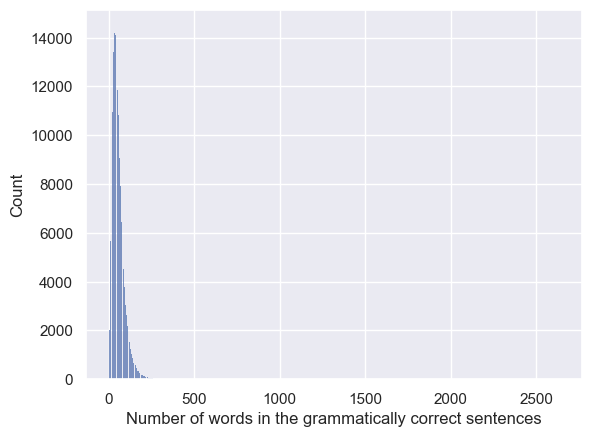

In [17]:
sns.set_theme()
ax = sns.histplot(data=len_1)
ax.set_xlabel('Number of words in the grammatically correct sentences')

Text(0.5, 0, 'Number of words in the grammatically incorrect sentences')

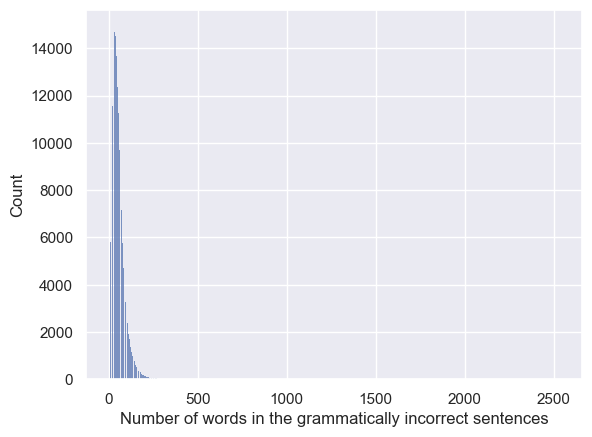

In [18]:
sns.set_theme()
ax = sns.histplot(data=len_2)
ax.set_xlabel('Number of words in the grammatically incorrect sentences')

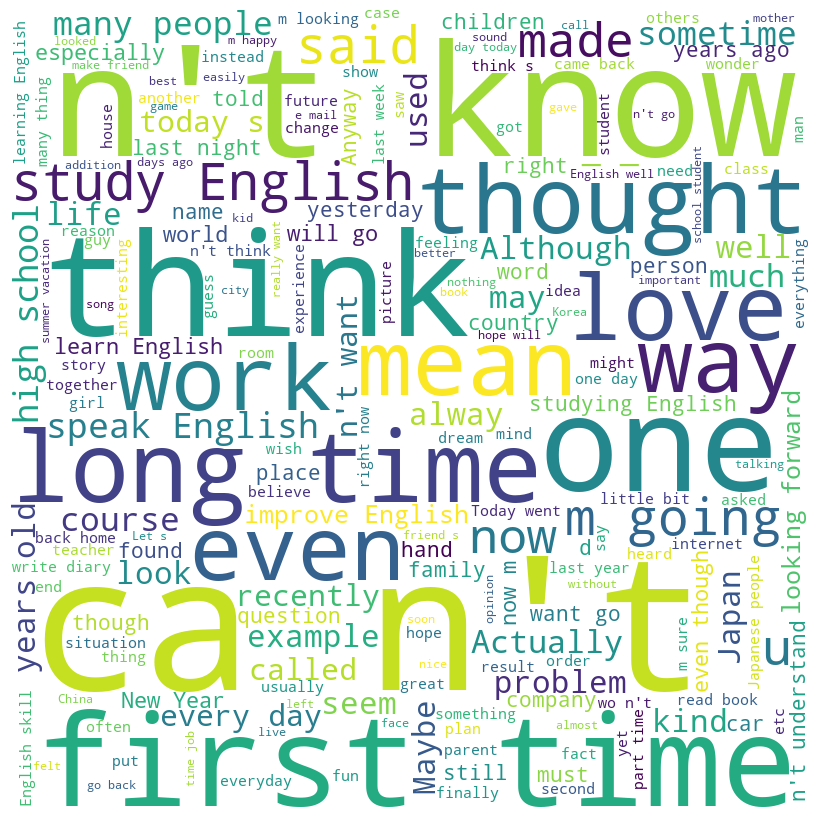

In [19]:
combined_text = ' '.join(final_data['error']) + ' ' + ' '.join(final_data['correct'])

stopwords = set(STOPWORDS)

filtered_text = ' '.join([word for word in combined_text.split() if word.lower() not in stopwords])

wordcloud_no_stopwords = WordCloud(width = 800, height = 800, 
                                   background_color ='white', 
                                   min_font_size = 10).generate(filtered_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_no_stopwords) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

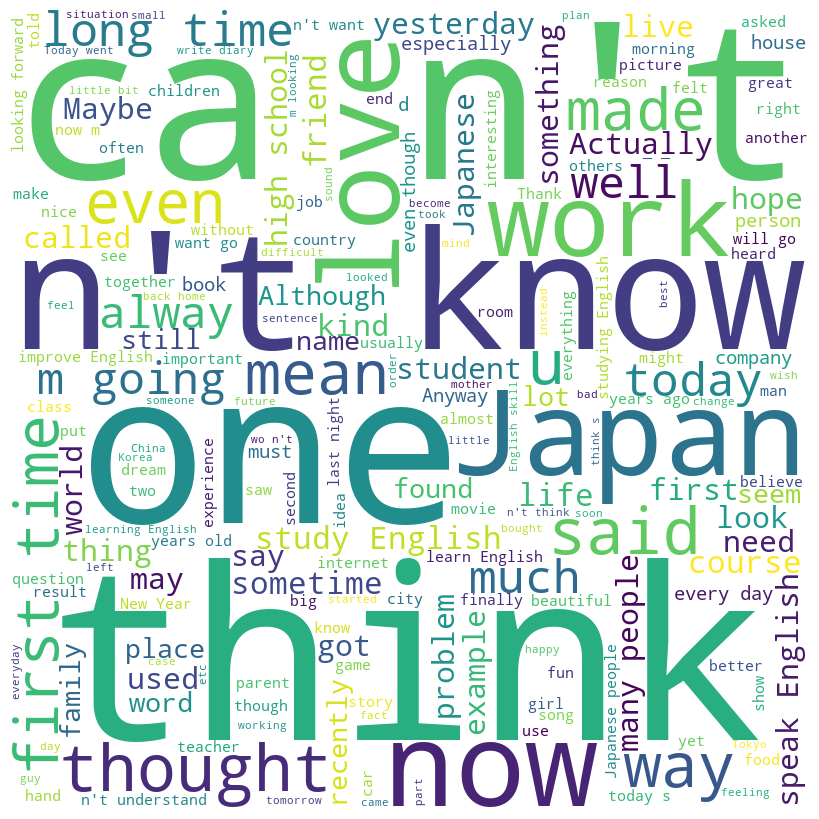

In [20]:
correct_text = " ".join(final_data['correct'])

stopwords = set(STOPWORDS)

filtered_text = ' '.join([word for word in correct_text.split() if word.lower() not in stopwords])

wordcloud_no_stopwords = WordCloud(width = 800, height = 800, 
                                   background_color ='white', 
                                   min_font_size = 10).generate(filtered_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_no_stopwords) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

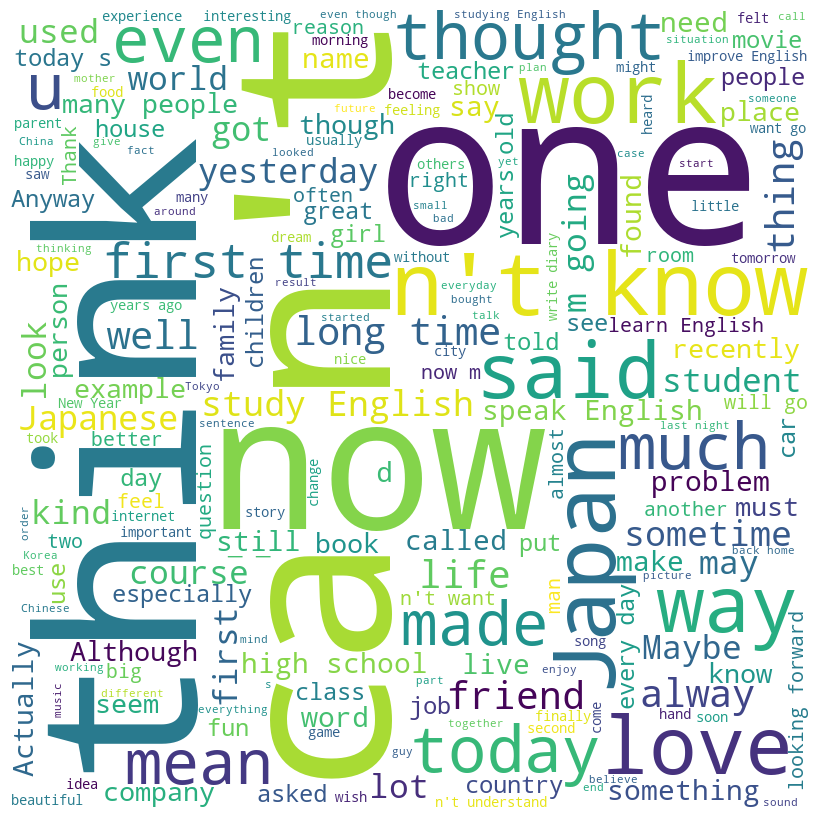

In [21]:
error_text = " ".join(final_data['error'])

stopwords = set(STOPWORDS)

filtered_text = ' '.join([word for word in error_text.split() if word.lower() not in stopwords])

wordcloud_no_stopwords = WordCloud(width = 800, height = 800, 
                                   background_color ='white', 
                                   min_font_size = 10).generate(filtered_text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_no_stopwords) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

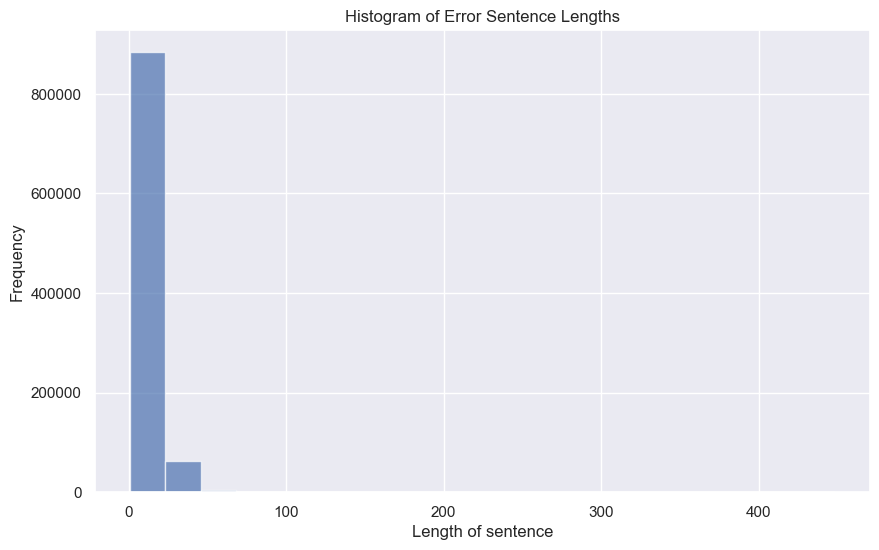

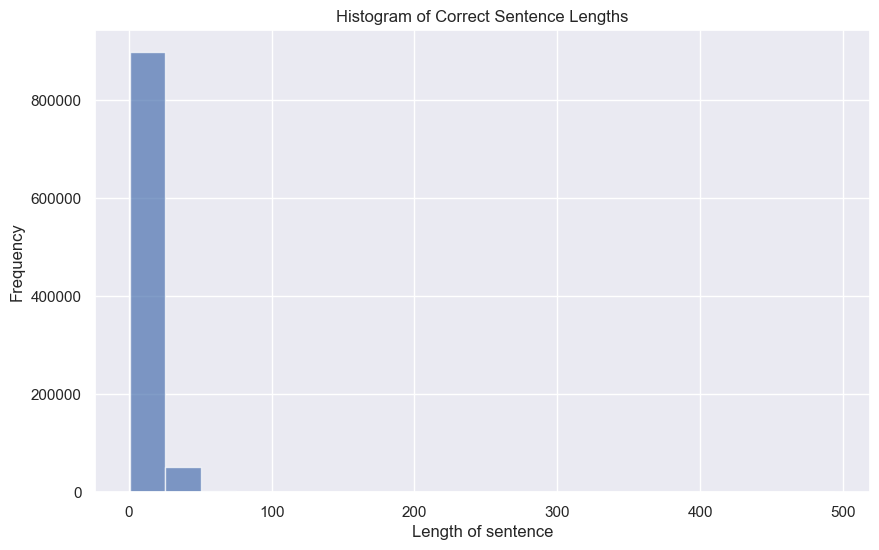

In [22]:
def plot_sentence_length_histogram(data, column, title):
    sentence_lengths = data[column].str.split().str.len()
    plt.figure(figsize=(10,6))
    plt.hist(sentence_lengths, bins=20, alpha=0.7)
    plt.title(f'Histogram of {title} Sentence Lengths')
    plt.xlabel('Length of sentence')
    plt.ylabel('Frequency')
    plt.show()

plot_sentence_length_histogram(final_data, 'error', 'Error')
plot_sentence_length_histogram(final_data, 'correct', 'Correct')

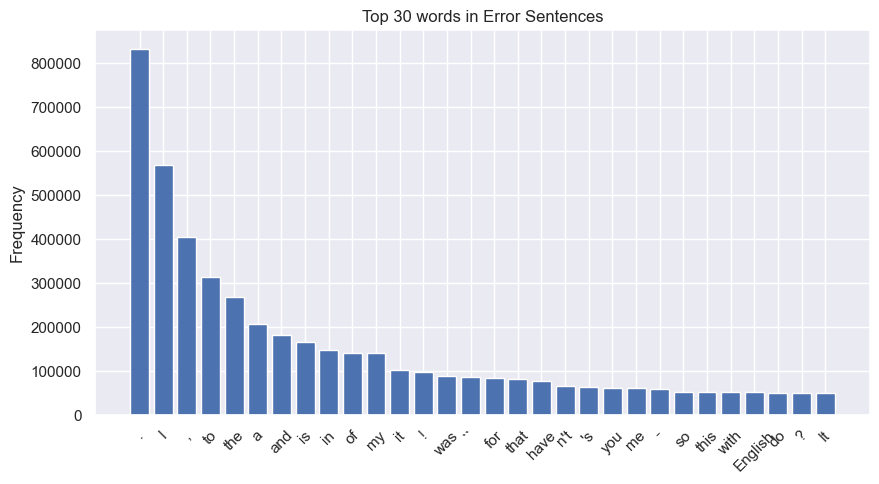

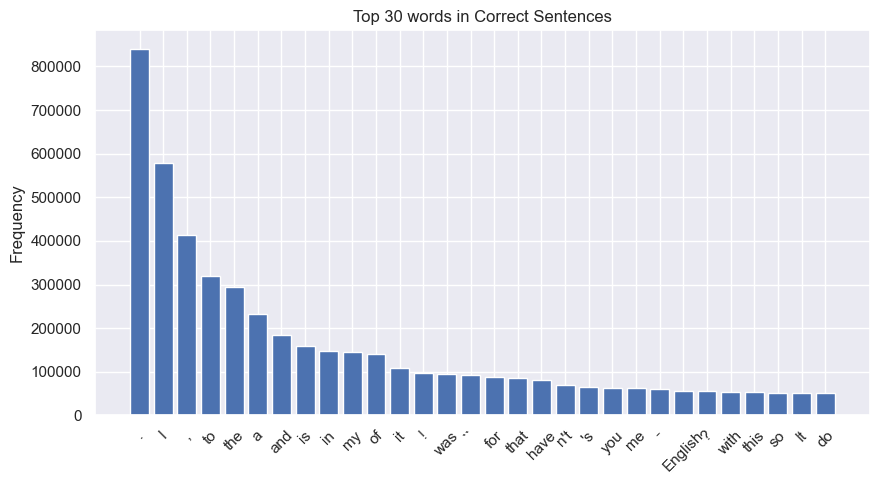

In [23]:
from collections import Counter

def plot_top_n_words(text, title, n=30):
    words = text.split()
    counter = Counter(words)
    most_common = counter.most_common(n)
    words, counts = zip(*most_common)
    plt.figure(figsize=(10,5))
    plt.bar(words, counts)
    plt.title(f'Top {n} words in {title}')
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.show()

plot_top_n_words(error_text, 'Error Sentences')
plot_top_n_words(correct_text, 'Correct Sentences')

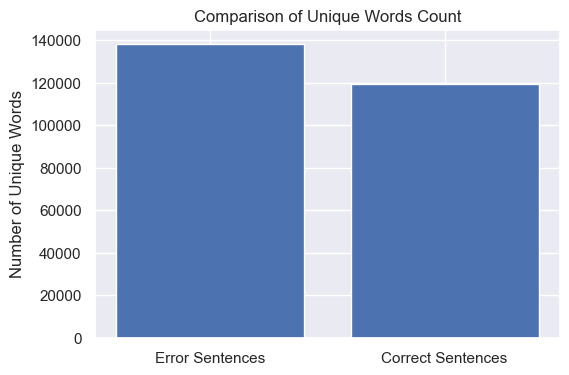

In [24]:
unique_words_error = len(set(error_text.split()))
unique_words_correct = len(set(correct_text.split()))
plt.figure(figsize=(6,4))
plt.bar(['Error Sentences', 'Correct Sentences'], [unique_words_error, unique_words_correct])
plt.title('Comparison of Unique Words Count')
plt.ylabel('Number of Unique Words')
plt.show()

In [25]:
for i, row in enumerate(final_data['error']):
  if row.split(" ") == final_data['correct'].iloc[i].split(" ") or len(row.split(" ")) >= 15 or len(row.split(" ")) <= 5:
    final_data.iloc[i] = np.nan

In [26]:
final_data = final_data.dropna()

In [27]:
final_data.describe()

,correct,error
count,290191,290191
unique,288128,289484
top,This is my first diary entry .,This is my first writing .
freq,20,5


In [28]:
final_data

,correct,error
3,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .
4,"Actually , he was the one who let me know about Lang - 8 . .","Actually , who let me know about Lang - 8 was him ."
6,His Kanji ability is much better than mine .,His Kanji 's ability is much better than me .
11,I heard a sentence last night when I was watching TV .,I heard a sentence last night when I watched TV .
15,"When you go uphill , you have to bend your back .","When you go uphill , you hvae to bend your back ."
...,...,...
1037266,I will introduce another topic concerning cherry blossom trees .,I introduce another one topic concerning cherry blossom tree .
1037269,The cherry blossoms bloom fully in spring .,The cherry blossom trees opens fully in spring .
1037272,while drinking and talking under the trees ( you already mentioned the season earlier ) .,with drinking and talking under the cherry blossoms in spring .
1037282,"I 'm thinking twice a week , each session as a two - hour lesson .","I 'm thinking twice a week , each has two - hour lesson ."


In [29]:
final_data.isna().any()

correct    False
error      False
dtype: bool

In [30]:
def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"gon na", " going to", phrase)
    phrase = re.sub(r"wan na", " want to", phrase)
    phrase = re.sub(r"gonna", " going to", phrase)
    phrase = re.sub(r"wanna", " want to", phrase)


    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub("\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    return phrase

def clean_text(t):

  t = unicodedata.normalize('NFKD', t).encode('ascii', 'ignore').decode('ascii') #
  t = decontracted(t)

  t = re.sub(r'x D', '', t)
  t = re.sub(r': D', '', t)
  t = re.sub(r': P', '', t)

  t = re.sub(r'xD', '', t)
  t = re.sub(r':D', '', t)
  t = re.sub(r':P', '', t)

  if '(' in t and ')' in t:
    try:
      t = re.sub(t.split("(")[-1].split(")")[0], '', t)
    except:
      pass
    #t = re.sub("(", '', t)
    #t = re.sub(")", '', t)

  t = re.sub(r'[^A-Za-z;!?.,\-\' ]+', ' ', t)

  t = re.sub(r'\.+',r' .',t)
  t = re.sub(r'\;+',r' , ',t)
  t = re.sub(r'!+',r' !',t )
  t = re.sub(r'\?+',r' ?',t )
  t = re.sub(r'\-+',r' - ',t )
  t = re.sub(r'\,+',r' , ',t )
  t = re.sub(r'\'+',r" ' ",t)
  t = re.sub(' +', ' ', t)

  return t

In [31]:
final_data['correct'] = final_data['correct'].apply(clean_text)
final_data['error'] = final_data['error'].apply(clean_text)

In [32]:
final_data[:50]

,correct,error
3,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .
4,"Actually , he was the one who let me know about Lang - . .","Actually , who let me know about Lang - was him ."
6,His Kanji ability is much better than mine .,His Kanji is ability is much better than me .
11,I heard a sentence last night when I was watching TV .,I heard a sentence last night when I watched TV .
15,"When you go uphill , you have to bend your back .","When you go uphill , you hvae to bend your back ."
17,"When everything is going smoothly , you have to be more modest .","When you are go smoothly , you have to be more modest ."
23,Making souvenirs is a hard but interesting work .,The making souvenir is a hard and interesting work .
36,"You know , you can ? them at a slot machine .","You know , you can take them at slot machine ."
38,The third memory is the house where we lived .,The third memory is the house we lived .
44,I liked Finland in the Winter .,I liked the winter Finland .


In [33]:
final_data.describe()

,correct,error
count,290191,290191
unique,286930,288674
top,,
freq,578,544


In [34]:
final_data = final_data.drop_duplicates()
final_data = final_data.dropna()

In [35]:
final_data.describe()

,correct,error
count,289521,289521
unique,286930,288674
top,,
freq,70,32


In [36]:
final_data.to_csv('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/preprocessed_15.csv', index = False)

In [37]:
final_data = pd.read_csv('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/preprocessed_15.csv')

In [38]:
for i, row in enumerate(final_data['error']):
  if row.split(" ") == final_data['correct'].iloc[i].split(" "):
    final_data.iloc[i] = np.nan

In [39]:
final_data = final_data.dropna()

In [40]:
final_data.describe()

,correct,error
count,287991,287991
unique,285441,287162
top,,
freq,69,31


In [41]:
import pandas as pd
import nltk
nltk.download('punkt')

def identify_errors(row):
    error_tokens = nltk.word_tokenize(row['error'])
    correct_tokens = nltk.word_tokenize(row['correct'])
    return [word for word in error_tokens if word not in correct_tokens]

final_data['identified_errors'] = final_data.apply(identify_errors, axis=1)

error_frequency = final_data['identified_errors'].explode().value_counts()

print(error_frequency.head(10))

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


identified_errors
the    13393
is     12504
a      11793
to     11292
in      8823
,       8735
of      8191
.       7089
it      5692
for     5522
Name: count, dtype: int64


In [42]:
final_data.head(10)

,correct,error,identified_errors
0,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .,[subject]
1,"Actually , he was the one who let me know about Lang - . .","Actually , who let me know about Lang - was him .",[him]
2,His Kanji ability is much better than mine .,His Kanji is ability is much better than me .,[me]
3,I heard a sentence last night when I was watching TV .,I heard a sentence last night when I watched TV .,[watched]
4,"When you go uphill , you have to bend your back .","When you go uphill , you hvae to bend your back .",[hvae]
5,"When everything is going smoothly , you have to be more modest .","When you are go smoothly , you have to be more modest .","[are, go]"
6,Making souvenirs is a hard but interesting work .,The making souvenir is a hard and interesting work .,"[The, making, souvenir, and]"
7,"You know , you can ? them at a slot machine .","You know , you can take them at slot machine .",[take]
8,The third memory is the house where we lived .,The third memory is the house we lived .,[]
9,I liked Finland in the Winter .,I liked the winter Finland .,[winter]


In [43]:
final_data.to_csv('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/final_preprocessed_15.csv', index = False)

In [44]:
len_1 = [ len(final_data['correct'].iloc[i]) for i in range(len(final_data['correct'])) ]
len_2= [ len(final_data['error'].iloc[i]) for i in range(len(final_data['error'])) ]

Text(0.5, 0, 'Number of words in the grammatically correct sentences')

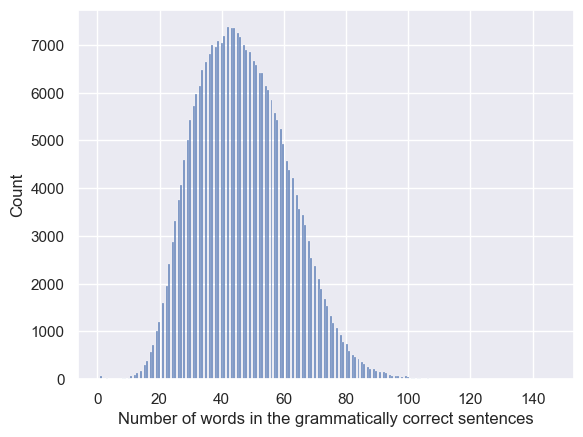

In [45]:
sns.set_theme()
ax = sns.histplot(data=len_1)
ax.set_xlabel('Number of words in the grammatically correct sentences')

Text(0.5, 0, 'Number of words in the grammatically incorrect sentences')

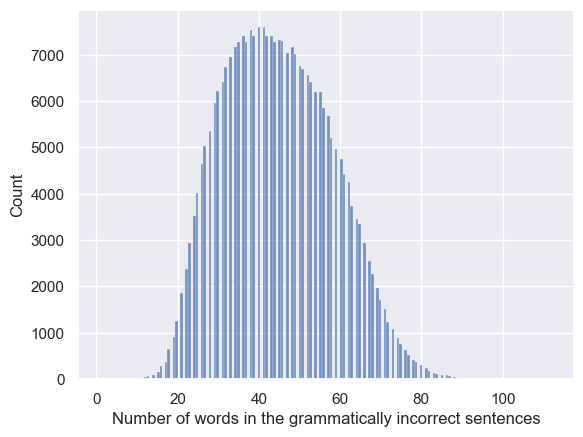

In [46]:

sns.set_theme()
ax = sns.histplot(data=len_2)
ax.set_xlabel('Number of words in the grammatically incorrect sentences')

# GEC_Baseline_Attention

In [47]:
import re
import datetime
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
import keras
import tensorflow as tf
from sklearn.metrics import fbeta_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import TensorBoard
from keras.layers import Embedding,LSTM, TimeDistributed, Dense, Bidirectional
from keras.initializers import HeNormal, GlorotNormal, GlorotUniform
from nltk.translate.bleu_score import sentence_bleu
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/final_preprocessed_15.csv')

In [49]:
pd.options.display.max_colwidth = 500
data[:50]

,correct,error,identified_errors
0,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .,['subject']
1,"Actually , he was the one who let me know about Lang - . .","Actually , who let me know about Lang - was him .",['him']
2,His Kanji ability is much better than mine .,His Kanji is ability is much better than me .,['me']
3,I heard a sentence last night when I was watching TV .,I heard a sentence last night when I watched TV .,['watched']
4,"When you go uphill , you have to bend your back .","When you go uphill , you hvae to bend your back .",['hvae']
5,"When everything is going smoothly , you have to be more modest .","When you are go smoothly , you have to be more modest .","['are', 'go']"
6,Making souvenirs is a hard but interesting work .,The making souvenir is a hard and interesting work .,"['The', 'making', 'souvenir', 'and']"
7,"You know , you can ? them at a slot machine .","You know , you can take them at slot machine .",['take']
8,The third memory is the house where we lived .,The third memory is the house we lived .,[]
9,I liked Finland in the Winter .,I liked the winter Finland .,['winter']


In [50]:
def preprocess(t, add_start_token, add_end_token):

  if add_start_token == True and add_end_token == False:
    t = '<start>'+' '+t
  if add_start_token == False and add_end_token == True:
    t = t+' '+'<end>'
  if add_start_token == True and add_end_token == True:
    t = '<start>'+' '+t+' '+'<end>'

  t = re.sub(' +', ' ', t)
  return t

In [51]:
encoder_input = [preprocess(line, add_start_token= True, add_end_token=True) for line in data['error']]
decoder_input = [preprocess(line, add_start_token= True, add_end_token=False) for line in data['correct']]
decoder_output = [preprocess(line, add_start_token= False, add_end_token=True) for line in data['correct']]

In [52]:
print(encoder_input[0])
print(decoder_input[0])
print(decoder_output[0])

<start> And he took in my favorite subject like soccer . <end>
<start> And he took in my favorite subjects like soccer .
And he took in my favorite subjects like soccer . <end>


In [53]:
tokenizer = Tokenizer(filters='', split=" ")
tokenizer.fit_on_texts(encoder_input)
word_index = tokenizer.word_index

max_length = max([ len(row.split(" ")) for row in encoder_input ])
INPUT_ENCODER_LENGTH = max_length

enc_input_encoded = tokenizer.texts_to_sequences(encoder_input)
enc_input_padded= pad_sequences(enc_input_encoded, maxlen=INPUT_ENCODER_LENGTH, padding="post")

print(enc_input_padded.shape)

(287991, 17)


In [54]:
print(encoder_input[0])
print(enc_input_padded[0])

<start> And he took in my favorite subject like soccer . <end>
[  1  11  46 177  13  10 280 901  39 614   3   2   0   0   0   0   0]


In [55]:
decoder_data = decoder_input.copy()
decoder_data.extend(decoder_output)

out_tokenizer = Tokenizer(filters='', split=" ")
out_tokenizer.fit_on_texts(decoder_data)
word_index = out_tokenizer.word_index

max_length = max([ len(row.split(" ")) for row in decoder_input ])
INPUT_DECODER_LENGTH = max_length

In [56]:
dec_input_encoded = out_tokenizer.texts_to_sequences(decoder_input)
dec_input_padded= pad_sequences(dec_input_encoded, maxlen=INPUT_DECODER_LENGTH, padding="post", truncating = "post")

print(dec_input_padded.shape)

(287991, 29)


In [57]:
print(decoder_input[0])
print(dec_input_padded[0])

<start> And he took in my favorite subjects like soccer .
[   3   12   46  178   13   10  266 1499   41  608    1    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [58]:
dec_output_encoded = out_tokenizer.texts_to_sequences(decoder_output)
dec_output_padded= pad_sequences(dec_output_encoded, maxlen=INPUT_DECODER_LENGTH, padding="post", truncating = "post")

print(dec_output_padded.shape)

(287991, 29)


In [59]:
print(decoder_output[1])
print(dec_output_padded[1])

Actually , he was the one who let me know about Lang - . . <end>
[269   6  46  17   5  60 106 316  26  74  37 169  44   1   1   4   0   0
   0   0   0   0   0   0   0   0   0   0   0]


In [60]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = np.asarray(tokens[1:])
    return data

In [61]:
embedding_index = load_vectors('wiki-news-300d-1M.vec')

In [62]:
word_index = tokenizer.word_index
num_tokens = len(word_index) + 2
embedding_dim = 300
hits = 0
misses = 0

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)

    if type(embedding_vector) == np.ndarray and embedding_vector.shape[0] == 300:
        embedding_matrix[i] = embedding_vector
        hits += 1

    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
np.save('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/in_embedding.npy', embedding_matrix)

Converted 31914 words (20463 misses)


In [63]:
word_index = out_tokenizer.word_index
num_tokens = len(word_index) + 2
embedding_dim = 300
hits = 0
misses = 0

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)

    if type(embedding_vector) == np.ndarray and embedding_vector.shape[0] == 300:
        embedding_matrix[i] = embedding_vector
        hits += 1

    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
np.save('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/out_embedding.npy', embedding_matrix)

Converted 28633 words (12426 misses)


In [64]:
in_embedding_matrix = np.load('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/in_embedding.npy')
out_embedding_matrix = np.load('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/out_embedding.npy')
print(in_embedding_matrix.shape, out_embedding_matrix.shape)

(52379, 300) (41061, 300)


In [65]:
class Encoder(tf.keras.Model):
    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        self.vocab_size = inp_vocab_size
        self.embedding_size = embedding_size
        self.lstm_units = lstm_size
        self.input_length = input_length

    def build(self, input_sequence):
        self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.embedding_size, input_length=self.input_length,
                                   weights = [in_embedding_matrix], mask_zero=True,
                                   trainable = False, name="embedding_layer_encoder")
        self.lstm = LSTM(self.lstm_units, return_state=True, return_sequences=True, name="Encoder_LSTM")

    def call(self,input_sequence,states):
        input_embedding = self.embedding(input_sequence)
        self.lstm_output, self.state_h, self.state_c = self.lstm(input_embedding, initial_state= states)
        return self.lstm_output, self.state_h, self.state_c

    def initialize_states(self,batch_size):

      lstm_state_h = tf.zeros((batch_size, self.lstm_units), dtype=tf.dtypes.float32, name="Encoder_LSTM_hidden_state")
      lstm_state_c = tf.zeros((batch_size, self.lstm_units), dtype=tf.dtypes.float32, name="Encoder_LSTM_cell_state")

      return lstm_state_h, lstm_state_c

In [66]:
def dot_func(encoder_output, decoder_hidden_state):
  decoder_hidden_state = tf.reshape(decoder_hidden_state, [decoder_hidden_state.shape[0],1,decoder_hidden_state.shape[1]])
  dot_product = tf.matmul(encoder_output, decoder_hidden_state, transpose_b = True)
  return dot_product

In [67]:
class Attention(tf.keras.layers.Layer):

  def __init__(self,scoring_function, att_units):
    super().__init__()

    self.scoring_function = scoring_function
    self.att_units = att_units
    self.timesteps = 0

  def build(self, data_shape):
      self.encoder_units = data_shape[1]

  def call(self,decoder_hidden_state,encoder_output):

    if self.scoring_function == 'dot':
        alpha_ = tf.nn.softmax(dot_func(encoder_output, decoder_hidden_state), axis = 1)
        c_t = sum([alpha_[:,i,]*encoder_output[:,i,:] for i in range(alpha_.shape[1])])
        c_t = tf.convert_to_tensor(c_t, dtype= tf.float32)
        return c_t, alpha_

In [68]:
class One_Step_Decoder(tf.keras.Model):
  def __init__(self,tar_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
      super().__init__()

      self.dec_units = dec_units
      self.att_units = att_units
      self.tar_vocab_size = tar_vocab_size
      self.embedding_dim = embedding_dim
      self.input_length = input_length
      self.score_fun = score_fun
      self.dense = Dense(self.tar_vocab_size)

  def build(self,input):
      self.embedding = Embedding(input_dim=self.tar_vocab_size, output_dim=self.embedding_dim, input_length=self.input_length,
                                   weights = [out_embedding_matrix], mask_zero=True,
                                   trainable = False, name="embedding_layer_decoder")
      self.lstm = LSTM(self.dec_units, return_state=True, return_sequences=True, name="One_step_decoder_LSTM")


  def call(self,input_to_decoder, encoder_output, state_h,state_c):

    input_embedding = self.embedding(input_to_decoder)

    if self.score_fun == 'dot':
      attention=Attention('dot',self.att_units)
      context_vector,attention_weights=attention(state_h,encoder_output)

    out = tf.concat([input_embedding,tf.expand_dims(context_vector, axis = 1)], axis =2)

    self.lstm_output, self.state_h, self.state_c = self.lstm(out, initial_state=[state_h, state_c])
    result_out = self.dense(self.lstm_output)

    return  tf.squeeze(result_out) , self.state_h,self.state_c, attention_weights, context_vector

In [69]:
class Decoder(tf.keras.Model):
    def __init__(self,out_vocab_size, embedding_dim, input_length, dec_units ,score_fun ,att_units):
      super().__init__()
      self.dec_units = dec_units
      self.att_units = att_units
      self.out_vocab_size = out_vocab_size
      self.embedding_dim = embedding_dim
      self.input_length = input_length
      self.score_fun = score_fun
      self.one_step_decoder = One_Step_Decoder(self.out_vocab_size, self.embedding_dim, self.input_length, self.dec_units ,self.score_fun ,self.att_units)

    def call(self, input_to_decoder,encoder_output,decoder_hidden_state,decoder_cell_state ):
        out_array = tf.TensorArray(tf.float32, size = input_to_decoder.shape[1], name = 'out_array')

        for timestep in range(input_to_decoder.shape[1]):
          output,decoder_hidden_state,decoder_cell_state,attention_weights, context_vector= self.one_step_decoder(input_to_decoder[:,timestep:timestep+1],encoder_output,decoder_hidden_state,decoder_cell_state)

          out_array = out_array.write(timestep, output)

        out_array = tf.transpose(out_array.stack(), [1,0,2])
        return out_array

In [70]:
INPUT_VOCAB_SIZE = len(list(tokenizer.word_index)) +2
OUTPUT_VOCAB_SIZE = len(list(out_tokenizer.word_index)) +2
BATCH_SIZE = 16
print(INPUT_VOCAB_SIZE, INPUT_ENCODER_LENGTH, OUTPUT_VOCAB_SIZE, INPUT_DECODER_LENGTH, BATCH_SIZE)

52379 17 41061 29 16


In [71]:
class encoder_decoder(tf.keras.Model):
  def __init__(self, enc_units, dec_units, scoring_func, att_units):
    super().__init__()
    self.scoring_func = scoring_func
    self.att_units = att_units
    self.dec_units = dec_units
    self.enc_units = enc_units
    self.encoder = Encoder(INPUT_VOCAB_SIZE, embedding_size = 300, lstm_size= self.enc_units , input_length= INPUT_ENCODER_LENGTH)
    self.decoder = Decoder(OUTPUT_VOCAB_SIZE, embedding_dim = 300, input_length = None, dec_units= self.dec_units ,score_fun =self.scoring_func,att_units = self.att_units)


  def call(self,data):

    input, output = data[0], data[1]
    states = self.encoder.initialize_states(input.shape[0])
    encoder_output,encoder_final_state_h,encoder_final_state_c = self.encoder(input, states)
    decoder_output = self.decoder(output,encoder_output, encoder_final_state_h, encoder_final_state_c)

    return decoder_output

In [72]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none'
)

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [73]:
tf.random.set_seed(32)

encoder_input_datatset = tf.data.Dataset.from_tensor_slices(enc_input_padded[:10000])
decoder_input_datatset = tf.data.Dataset.from_tensor_slices(dec_input_padded[:10000])
decoder_output_datatset = tf.data.Dataset.from_tensor_slices(dec_output_padded[:10000])

full_dataset =  tf.data.Dataset.zip( ((encoder_input_datatset, decoder_input_datatset), decoder_output_datatset) ).shuffle(1000)
test_dataset = full_dataset.take(50).batch(32)
train_dataset = full_dataset.skip(50).batch(32)

print(train_dataset, test_dataset)

<_BatchDataset element_spec=((TensorSpec(shape=(None, 17), dtype=tf.int32, name=None), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None)), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None))> <_BatchDataset element_spec=((TensorSpec(shape=(None, 17), dtype=tf.int32, name=None), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None)), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None))>


In [74]:
train_dataset

<_BatchDataset element_spec=((TensorSpec(shape=(None, 17), dtype=tf.int32, name=None), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None)), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None))>

In [75]:
import shutil

In [77]:
def scheduler(epoch, lr):
   if epoch < 1:
     return lr
   else:
     return lr * tf.math.exp(-0.1)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir='logs')

class SaveModel(tf.keras.callbacks.Callback):

  def __init__(self):
    self.history = { 'loss' : [],  'val_loss' : []}
    self.init = 0

  def on_epoch_end(self, epoch, logs = {}):

    self.history['loss'].append(logs.get('loss'))
    if logs.get('val_loss', -1) != -1:
        self.history['val_loss'].append(logs.get('val_loss'))

    self.model.save_weights('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/weights_1_{}.h5'.format(epoch+self.init))

    df = pd.DataFrame(columns = ['loss','val_loss'])
    for col in df.columns:
      df[col] = self.history[col]
    df.to_csv('history_1_.csv')
    src_file = "history_.csv"
    dest_file = "C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/history_1.csv"
    shutil.copy(src_file, dest_file)

save_model = SaveModel()

In [78]:
def f_beta_score(y_true, y_pred):
  y_pred_sparse = tf.convert_to_tensor(np.argmax(y_pred, axis = -1), dtype = tf.float32)
  fb_score = [ fbeta_score(y_true[i], y_pred_sparse[i],average = 'macro',beta = 0.5) for i in range(y_true.shape[0])]
  return sum(fb_score)/len(fb_score)

In [79]:
tf.config.run_functions_eagerly(True)


input = np.random.randint(0, 64, size=(BATCH_SIZE, INPUT_ENCODER_LENGTH))
output = np.random.randint(0, 64, size=(BATCH_SIZE, INPUT_DECODER_LENGTH))
target = np.random.randint(0, 64, size=(BATCH_SIZE, INPUT_DECODER_LENGTH))

model = encoder_decoder(enc_units = 1024, dec_units = 1024, scoring_func = 'dot', att_units = 1024)
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=loss_function, metrics = [f_beta_score])
model.fit([input, output], target, steps_per_epoch=1)

model.summary()

c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 43s 43s/step - loss: 10.4393 - f_beta_score: 0.0000e+00
Model: "encoder_decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  21140900  
                                                                 
 decoder (Decoder)           multiple                  64027329  
                                                                 
Total params: 85168229 (324.89 MB)
Trainable params: 57136229 (217.96 MB)
Non-trainable params: 28032000 (106.93 MB)
_________________________________________________________________


In [80]:
model.load_weights('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/weights_9.h5')

In [81]:
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 2,
          callbacks = [early_stopping,tensorboard_cb, save_model])

Epoch 1/2


311/311 [==============================] - 8286s 27s/step - loss: 0.4401 - f_beta_score: 0.5075 - val_loss: 0.4174 - val_f_beta_score: 0.5046
Epoch 2/2
311/311 [==============================] - 8283s 27s/step - loss: 0.2912 - f_beta_score: 0.5991 - val_loss: 0.2632 - val_f_beta_score: 0.5969


In [82]:
model.load_weights('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/weights_1_1.h5')

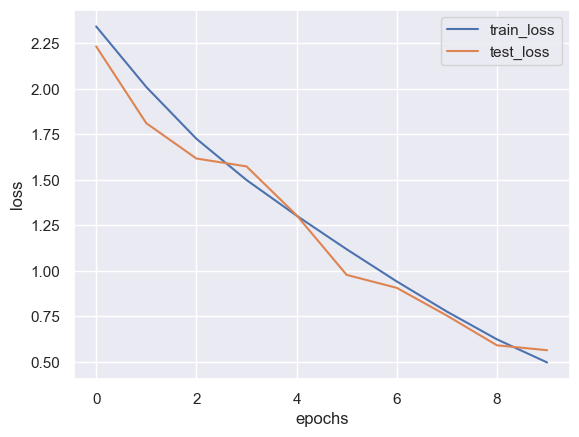

In [83]:
df= pd.read_csv('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/history_1.csv')
plt.plot(range(0, len(df['loss'])), df['loss'], label = 'train_loss')
plt.plot(range(0, len(df['val_loss'])), df['val_loss'], label = 'test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [84]:
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 2,
          callbacks = [early_stopping,tensorboard_cb, save_model])

Epoch 1/2
311/311 [==============================] - 8166s 26s/step - loss: 0.2196 - f_beta_score: 0.6443 - val_loss: 0.2594 - val_f_beta_score: 0.6283
Epoch 2/2
311/311 [==============================] - 8213s 26s/step - loss: 0.1656 - f_beta_score: 0.6820 - val_loss: 0.1498 - val_f_beta_score: 0.6787


In [85]:
model.load_weights('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/weights_1_1.h5')

In [86]:
def input_processor(input_sentence, pad_seq):

  encoder_input = preprocess(input_sentence, add_start_token= True, add_end_token=True)

  tokenized_text = tokenizer.texts_to_sequences([encoder_input])
  if pad_seq == True:
    tokenized_text = pad_sequences(tokenized_text, maxlen=INPUT_ENCODER_LENGTH, padding="post")

  tokenized_text = tf.convert_to_tensor(tokenized_text, dtype = tf.float32)
  return tokenized_text


def remove_end_token(words):
  words_list = words.split(' ')[:-1]
  words = " ".join(words_list)
  return words

In [87]:
def plot_attention(AW, IN, OUT):
  print(IN)
  print(OUT)
  plt.figure(figsize = (8,6))
  sns.set_theme()
  ax = sns.heatmap(AW,xticklabels =  IN.split(" "), yticklabels= OUT.split(" "))
  ax.set_title('Attention weights')
  ax.set_xlabel('encoder_input')
  ax.set_ylabel('decoder_output')

In [88]:
def predict(input_sentence):

  input = input_processor(input_sentence, pad_seq = False)

  NUMBER_OF_INPUTS = input.shape[0]

  states = model.layers[0].initialize_states(NUMBER_OF_INPUTS)

  encoder_output,encoder_final_state_h, encoder_final_state_c = model.layers[0](input, states)

  input_decoder = np.zeros((1,1))
  input_decoder[0][0] = 2

  attention_wts = []
  decoder_output_list = []

  stop = False

  while stop != True:
    decoder_output,decoder_state_h,decoder_state_c, attention_weights, context_vector = model.layers[1].one_step_decoder(input_decoder, encoder_output, encoder_final_state_h, encoder_final_state_c)

    encoder_final_state_h = decoder_state_h
    encoder_final_state_c = decoder_state_c

    index = np.argmax(decoder_output,-1)
    attention_wts.append(attention_weights)
    decoder_output_list.append(index)

    input_decoder = np.asarray(index, dtype = np.float32)
    input_decoder = np.reshape(input_decoder, (NUMBER_OF_INPUTS,1))

    if input_decoder[0][0] == 4 or len(decoder_output_list) > input.shape[1]:
      stop =True

  arr_out = [int(np.asarray(i)) for i in decoder_output_list]

  output_words = out_tokenizer.sequences_to_texts([arr_out])

  return output_words, attention_wts


In [89]:
def translate(sent, ind, plot_attention_):
  out, attention_weights = predict(sent)

  OUT = out[0]
  IN = encoder_input[ind]

  if plot_attention_ == True:
    attention_weights = np.asarray(attention_weights)
    AW = np.reshape(attention_weights,(attention_weights.shape[0], attention_weights.shape[2]))
    plot_attention(AW, IN, OUT)

  return OUT

<start> And he took in my favorite subject like soccer . <end>
and took the my favorite subjects like soccer . <end>


'and took the my favorite subjects like soccer . <end>'

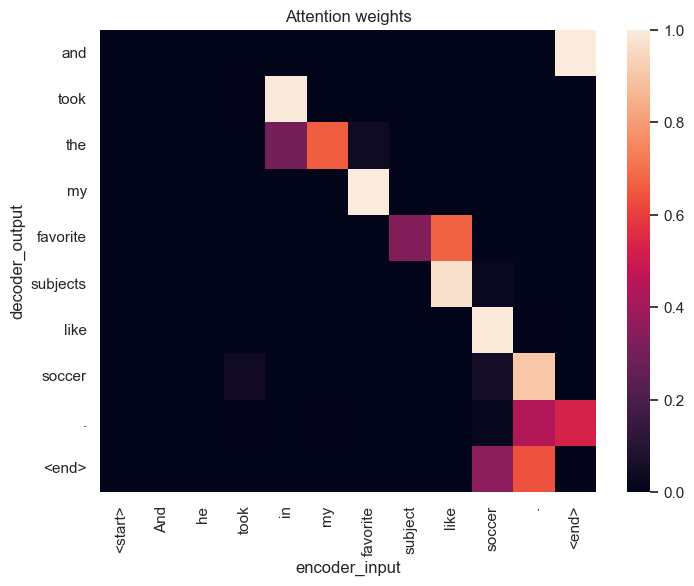

In [90]:
translate(data['error'].loc[0], 0, plot_attention_= True)

<start> His Kanji is ability is much better than me . <end>
his kanji ability is much better than me . <end>


'his kanji ability is much better than me . <end>'

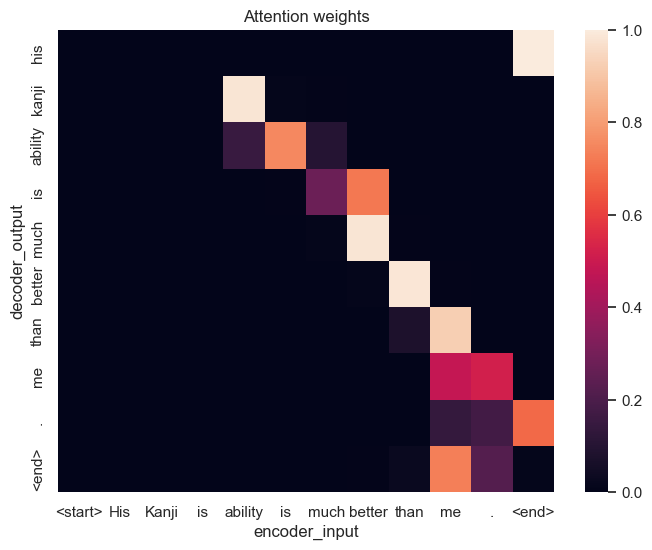

In [91]:
translate(data['error'].loc[2], 2, plot_attention_= True)

<start> You know , you can take them at slot machine . <end>
you know , you can leave them on a slot machine . <end>


'you know , you can leave them on a slot machine . <end>'

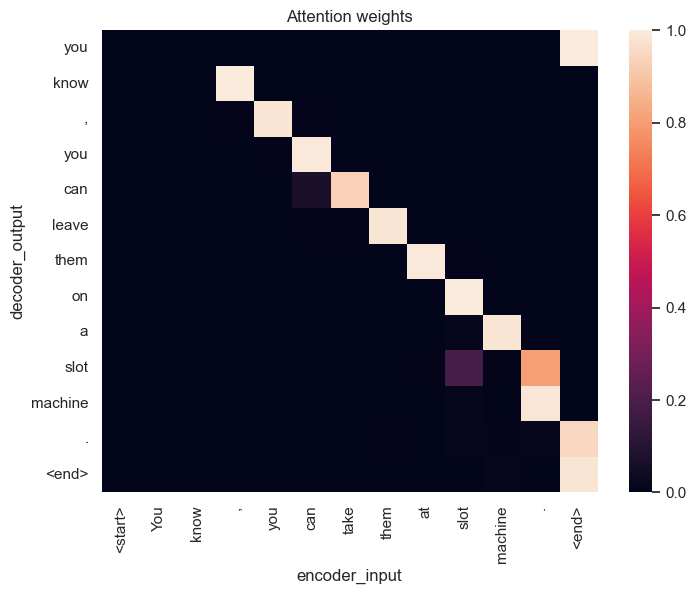

In [92]:
translate(data['error'].loc[7], 7, plot_attention_= True)

<start> If only I had black dense curtains . <end>
even only had a black curtains curtains . <end>


'even only had a black curtains curtains . <end>'

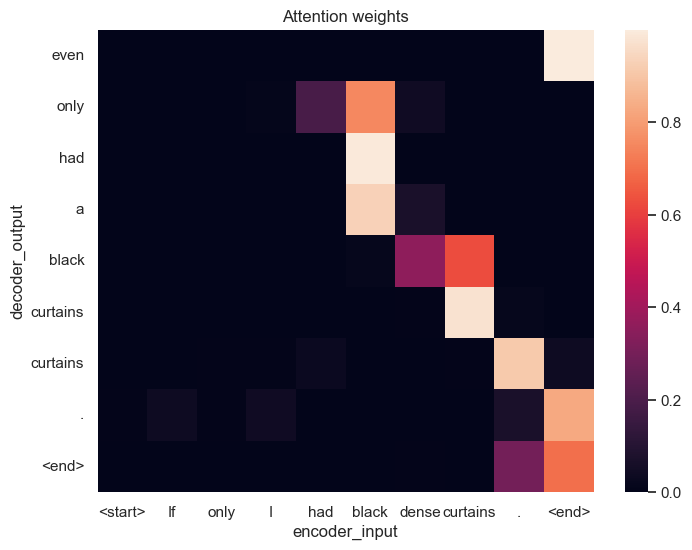

In [93]:
translate(data['error'].loc[11],11, plot_attention_= True)

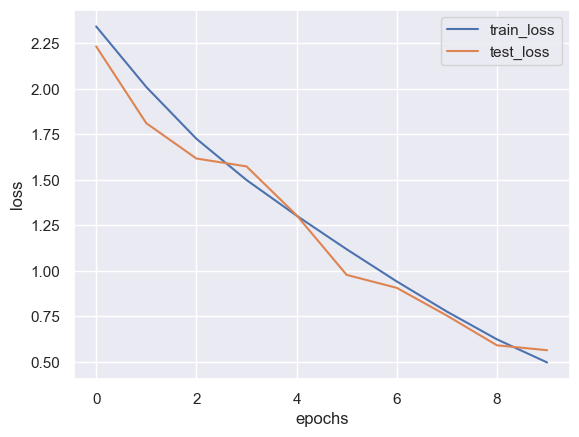

In [100]:
df= pd.read_csv('C:/ITE/ITE 5/NLP/practical_lectures/project/Scratch/history_1.csv')
plt.plot(range(0, len(df['loss'])), df['loss'], label = 'train_loss')
plt.plot(range(0, len(df['val_loss'])), df['val_loss'], label = 'test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [97]:
indices = [i for i in range(50)]
sent_list = [data['error'].loc[i] for i in indices]
bleu_scores_ = []
actual_output = []
output_sent_list = []

for i, sent in enumerate(tqdm(sent_list)):
  out,_ = predict(sent)
  actual_ = decoder_output[indices[i]]

  output_sent_list.append(out[0])
  actual_output.append(actual_)

  out_words = remove_end_token(out[0])
  actual_output_ = remove_end_token(actual_)

  bleu_scores_.append(sentence_bleu(actual_output_.split(' '), out_words.split(' ')))

print('Average BLEU score :',sum(bleu_scores_)/len(bleu_scores_))

  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\hm7al\AppData\Local\Programs\Python\Python39\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently 

Average BLEU score : 1.1908319823462085e-231


In [98]:
df = pd.DataFrame(columns= ['input_sentence', 'actual_output','translated_output', 'bleu_score'])
df['input_sentence'] = sent_list
df['actual_output'] = actual_output
df['translated_output'] = output_sent_list
df['bleu_score'] = bleu_scores_

In [99]:
df[:50]


,input_sentence,actual_output,translated_output,bleu_score
0,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer . <end>,and took the my favorite subjects like soccer . <end>,1.051835e-231
1,"Actually , who let me know about Lang - was him .","Actually , he was the one who let me know about Lang - . . <end>","actually , who one one let me know what know about lang . <end>",1.140985e-231
2,His Kanji is ability is much better than me .,His Kanji ability is much better than mine . <end>,his kanji ability is much better than me . <end>,1.051835e-231
3,I heard a sentence last night when I watched TV .,I heard a sentence last night when I was watching TV . <end>,i heard a sentence last night when i watched tv . <end>,1.316559e-231
4,"When you go uphill , you hvae to bend your back .","When you go uphill , you have to bend your back . <end>","when you go uphill , you have to bend your back . <end>",1.164047e-231
5,"When you are go smoothly , you have to be more modest .","When everything is going smoothly , you have to be more modest . <end>","when everything is going smoothly , you have to be more modest . <end>",1.140985e-231
6,The making souvenir is a hard and interesting work .,Making souvenirs is a hard but interesting work . <end>,making souvenirs is a hard and interesting work . <end>,1.250850e-231
7,"You know , you can take them at slot machine .","You know , you can ? them at a slot machine . <end>","you know , you can leave them on a slot machine . <end>",1.288230e-231
8,The third memory is the house we lived .,The third memory is the house where we lived . <end>,the third photo is the house we ever lived . <end>,1.024491e-231
9,I liked the winter Finland .,I liked Finland in the Winter . <end>,i liked finland in the winter . <end>,1.331960e-231
